> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a TMDb Movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>  Our Dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue and i want to analysis this Data To get useful information

This Dataset Contain : 10866  rows × 21 columns (befor clean)

### Question(s) for Analysis
1-Are The movies with high Budget get high Revenue ?

2-Are The movies with high Vote Average have high popularity ?

3-How long the average time for the movie is taken ?


In [1]:
#here we import libraries which we need to use
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

cheack for unuseful columns

Cheack for duplicates in data 


### General Properties


In [2]:
# Load your data and print out a few lines. Perform operations to inspect data

df=pd.read_csv('tmdb-movies.csv')

df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#   types and look for instances of missing or possibly errant data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
#cheack for dublicated raws and count them
df.duplicated().sum()

1

In [5]:
#converting data type of Release Date to datetime type
df['release_date']=pd.to_datetime(df['release_date'])

In [6]:
#getting rows which has 0 in budget and revenue to clear data
A1= df[df['budget']==0]
A2= df[df['revenue']==0]
A=A1.append(A2)


### Data Cleaning
drop dublicated rows

drop some columns

convertaing data types

In [7]:
#drop the columns which will not use in the analysis
df.drop(['id','imdb_id','overview','keywords','vote_count','original_title','tagline','homepage','production_companies'] ,axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
popularity      10866 non-null float64
budget          10866 non-null int64
revenue         10866 non-null int64
cast            10790 non-null object
director        10822 non-null object
runtime         10866 non-null int64
genres          10843 non-null object
release_date    10866 non-null datetime64[ns]
vote_average    10866 non-null float64
release_year    10866 non-null int64
budget_adj      10866 non-null float64
revenue_adj     10866 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(4), object(3)
memory usage: 1018.8+ KB


In [8]:
#drop the columns
df.drop_duplicates(inplace=True)

In [9]:
#cheacking for duplicates
df.duplicated().sum()

0

In [10]:
# drop rows with 0 value in budget and revenue
df.drop(A.index,inplace=True)

In [11]:
# overview the info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 12 columns):
popularity      3854 non-null float64
budget          3854 non-null int64
revenue         3854 non-null int64
cast            3850 non-null object
director        3853 non-null object
runtime         3854 non-null int64
genres          3854 non-null object
release_date    3854 non-null datetime64[ns]
vote_average    3854 non-null float64
release_year    3854 non-null int64
budget_adj      3854 non-null float64
revenue_adj     3854 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(4), object(3)
memory usage: 391.4+ KB


## Exploratory Data Analysis

In [12]:
#describing the statistics  for dataset
df.describe()

,popularity,budget,revenue,runtime,vote_average,release_year,budget_adj,revenue_adj
count,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,1.191554,3.720370e+07,1.076866e+08,109.220291,6.168163,2001.261028,4.423999e+07,1.370647e+08
std,1.475162,4.220822e+07,1.765393e+08,19.922820,0.794920,11.282575,4.480925e+07,2.161114e+08
min,0.001117,1.000000e+00,2.000000e+00,15.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.462368,1.000000e+07,1.360003e+07,95.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07
50%,0.797511,2.400000e+07,4.480000e+07,106.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07
75%,1.368324,5.000000e+07,1.242125e+08,119.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08
max,32.985763,4.250000e+08,2.781506e+09,338.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


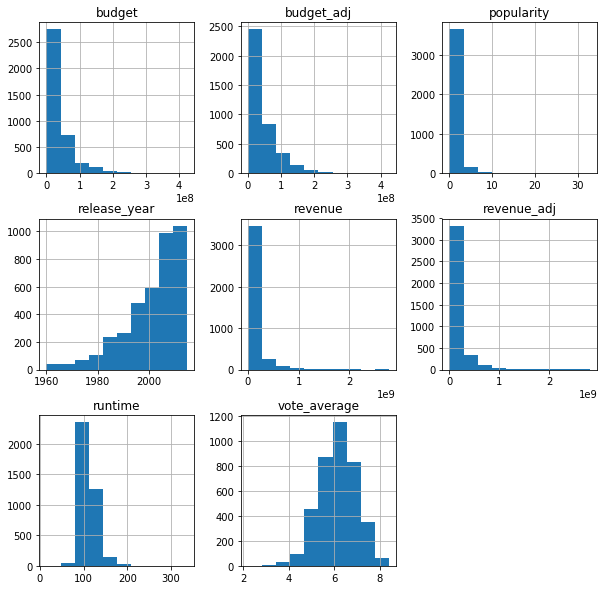

In [13]:
# plotting a histogram for overview the dataset
df.hist(figsize=(10,10));

### define a Function for plotting

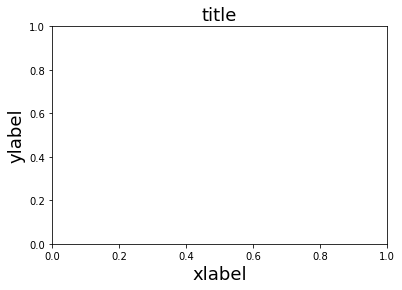

In [20]:
# define a Function for plotting Takeing a dataset and name of 2 columns then visualization them in scatter visualization
# to know relation between them and aswer questions
def plotting (dataset,columnforX,columnforY,title,xlabel,ylabel) :
    dataset.plot(x=columnforX,y=columnforY,kind='scatter',figsize=(10,10));
plt.title('title',fontsize=18 );
plt.xlabel('xlabel',fontsize=18);
plt.ylabel('ylabel',fontsize=18);


### Are The movies with high Budget get high Revenue ?

##### We listen about huge budget of movies is that mean when we pay more ?! , we get more revenue we will make a visualization between budget and revenue to know

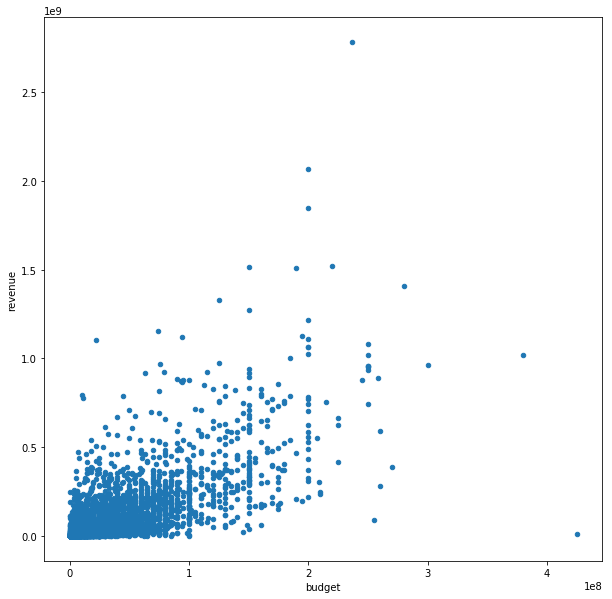

In [21]:
# visualization relation between budget and Revenue 
plotting (df,'budget','revenue', 'Relation Between Budget And' ,'Budget','Revenue')

- graph shows there are no relation between budget and average
- high budget doesn't mean high revenue

### Are The movies with high Vote Average have high popularity ?
##### now days ,many people wait after releasing movie some days to see reviews and vote before going to watch it 
##### lets see realtion between them

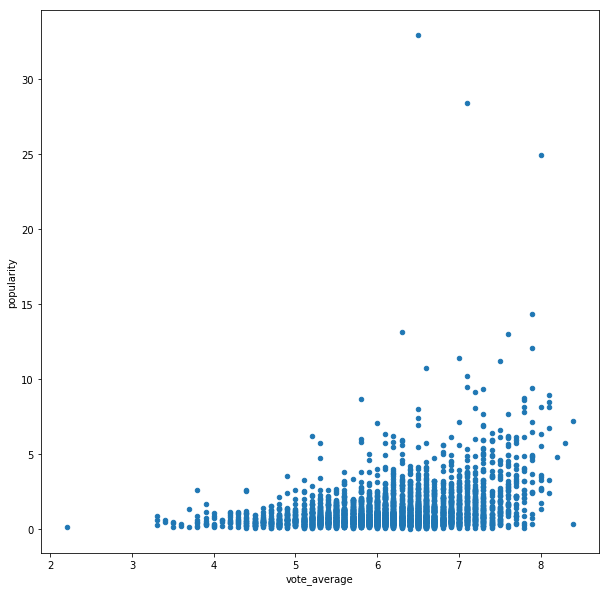

In [22]:
## visualization relation between Vote average and popularity 
plotting (df,'vote_average','popularity', 'Relation Between Popularity And Vote Average' ,'Vote Average','popularity')

- graph shows postive relation between Vote Average and population with left skewed  the high vote average the more popularity Hence, an increase in revenue


### How long the average time for the movie is taken ?
##### lets know the average of rut time movies

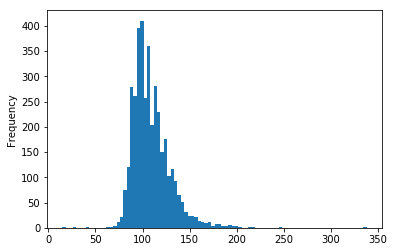

In [23]:
# plotting a histogram for runtime of movies 
df['runtime'].plot( kind ='hist',bins=90);

- graph shows normal distribution for run time

In [24]:
# getting the mean of runtime of movies 
df['runtime'].mean()

109.22029060716139

<a id='conclusions'></a>
## Conclusions
#### this data is very big and very good to answer  the questions we can release too many questions and answer by this data
#### after the analysis after the analysis we conclude that high budget doesn't mean high revenue , the mean duration for the movie 102 min , voting affects a high percentage in revenue 

### Limitations
###### it's not certain that the analysis is correct, because the data may be incorrect, and we didn't use advanced statistics, and we have lost a lot of data cause its incompleteness, which makes the analysis not accurate enough

## Submitting your Project 


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])